In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation
from sklearn.model_selection import cross_val_score

C:\Users\Prateek Jain\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cars = pd.read_csv('autos.csv',encoding='cp1252')

In [3]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#Checking if seller can be deleted

In [5]:
cars.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

In [6]:
cars.groupby('seller').size()

seller
gewerblich         3
privat        371525
dtype: int64

In [7]:
#Checking if offerType can be deleted

In [8]:
cars.offerType.unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [9]:
cars.groupby('offerType').size()

offerType
Angebot    371516
Gesuch         12
dtype: int64

In [10]:
#checking if abtest can be deleted

In [11]:
cars.abtest.unique()

array(['test', 'control'], dtype=object)

In [12]:
cars.groupby('abtest').size()

abtest
control    178943
test       192585
dtype: int64

In [13]:
cars.drop(['seller' , 'offerType' , 'dateCreated' , 'nrOfPictures'] , axis = 'columns' , inplace = True)

In [14]:
cars.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437,2016-04-06 10:17:21


In [15]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


In [16]:
print("Too new: %d" % cars.loc[cars.yearOfRegistration >= 2017].count()['name'])

Too new: 14680


In [17]:
cars.loc[cars.yearOfRegistration >= 2017].count()['name']

14680

In [18]:
cars.yearOfRegistration[cars.yearOfRegistration < 1950].count()

289

In [19]:
#cars.head()

In [20]:
#drop_duplicates will remove the rows with same value in specified columns

cars2 = cars.drop_duplicates(['name' , 'price' , 'vehicleType' ,'abtest', 'yearOfRegistration' , 'gearbox' , 'powerPS' , 'model' , 'kilometer' , 'monthOfRegistration' , 'fuelType' , 'notRepairedDamage'])

In [21]:
#remove useless data

In [22]:
#year of registration
cars = cars[(cars.yearOfRegistration > 1950) & (cars.yearOfRegistration <= 2017)]
cars2 = cars2[(cars2.yearOfRegistration > 1950) & (cars2.yearOfRegistration <= 2017)]

In [23]:
#cars2.describe()

In [24]:
#cars2.powerPS[cars.powerPS < 10].size

In [25]:
#power PS
cars = cars[(cars.powerPS >= 10) & (cars.powerPS <= 500)]
cars2 = cars2[cars2.powerPS >= 10 & (cars2.powerPS <= 500)]

In [26]:
#cars2.describe()

In [27]:
#price
#cars2.price[cars2.price < 100].count()

In [28]:
cars = cars[(cars.price >= 100)]
cars2 = cars2[cars2.price >= 100]

In [29]:
#cars2.describe()

In [30]:
#print(cars.isnull().sum())
#print(cars2.isnull().sum())

In [31]:
#fill the remaining null values

cars['notRepairedDamage'].fillna(value='not-declared', inplace=True)
cars['fuelType'].fillna(value='not-declared', inplace=True)
cars['gearbox'].fillna(value='not-declared', inplace=True)
cars['vehicleType'].fillna(value='not-declared', inplace=True)
cars['model'].fillna(value='not-declared', inplace=True)


cars2['notRepairedDamage'].fillna(value='not-declared', inplace=True)
cars2['fuelType'].fillna(value='not-declared', inplace=True)
cars2['gearbox'].fillna(value='not-declared', inplace=True)
cars2['vehicleType'].fillna(value='not-declared', inplace=True)
cars2['model'].fillna(value='not-declared', inplace=True)

In [32]:
#cars2.isnull().sum()

In [33]:
#plotting powerPS

In [34]:
import matplotlib.pyplot as plt

In [35]:
from matplotlib import style
style.use('ggplot')

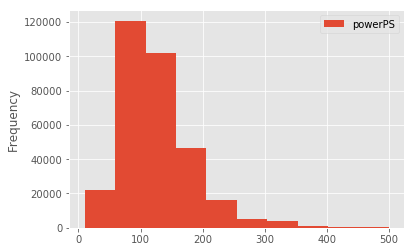

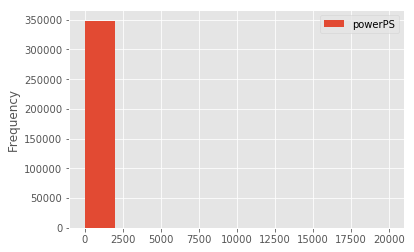

In [36]:
#%matplotlib inline
cars.plot(y='powerPS', kind='hist')
#plt.axis([0, 2000, 0, 200000])
cars2.plot(y='powerPS', kind='hist')
#plt.axis([0, 2000, 0, 200000])                          #set the axis range
plt.show()

In [37]:
#cars2.head()

In [38]:
#convert date to calculate age

In [39]:
#ageCol=[]
#from dateutil import parser

#for date in cars['dateCrawled']:
#    temp=parser.parse(date)
#    ageCol.append(temp.year)
    
#cars['Age'] = ageCol - cars.yearOfRegistration

#cars.describe()
#cars=cars[(cars['Age']>1)&(cars['Age']<50)]

In [40]:
#ageCol=[]

#from dateutil import parser

#for date in cars2['lastSeen']:
 #   temp=parser.parse(date)
#    ageCol.append(temp.year)
    
#cars2['Age'] = ageCol - cars2.yearOfRegistration

#cars2.describe()
#cars2=cars2[(cars2['Age']>1)&(cars2['Age']<50)]

In [41]:
date_cal = pd.to_datetime(cars['dateCrawled'])
date_cal = date_cal.dt.year

In [42]:
cars['Age'] = date_cal - cars.yearOfRegistration

In [43]:
#cars.head()

In [44]:
date_cal2 = pd.to_datetime(cars2['dateCrawled'])
date_cal2 = date_cal2.dt.year
cars2['Age'] = date_cal2 - cars2.yearOfRegistration
#cars2.head()

In [45]:
#separating the target

In [46]:
target = cars['price']
#del cars['price']

In [47]:
target2 = cars2['price']


In [48]:
cars2.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen,Age
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,not-declared,1993,manuell,0,golf,150000,0,benzin,volkswagen,not-declared,70435,2016-04-07 03:16:57,23
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,not-declared,125000,5,diesel,audi,ja,66954,2016-04-07 01:46:50,5
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,not-declared,90480,2016-04-05 12:47:46,12
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074,2016-03-17 17:40:17,15
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437,2016-04-06 10:17:21,8


In [49]:
#converting strings to integers

In [50]:
from sklearn import preprocessing

for cols in cars.columns:
    cars[cols]=preprocessing.LabelEncoder().fit_transform(cars[cols])
    
for cols in cars2.columns:
    cars2[cols]=preprocessing.LabelEncoder().fit_transform(cars2[cols])    

In [51]:
cars2.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen,Age
0,156923,74849,199,1,7,42,1,0,118,12,0,1,38,2,4897,168360,24
1,156665,3726,3516,1,3,60,1,190,163,11,5,3,1,0,4614,167878,6
2,73169,85354,2522,1,8,53,0,163,119,11,8,3,14,2,6992,152546,13
3,101391,72476,637,1,4,50,1,75,118,12,6,1,38,1,7032,41891,16
4,220476,161054,1269,1,4,57,1,69,103,9,7,3,31,1,4211,161456,9


In [52]:
del cars['price']
del cars2['price']

In [53]:
#scaling the data

In [54]:
cars_scale = preprocessing.scale(cars)

#cars22 = cars2.drop(['price'],1)
cars2_scale = preprocessing.scale(cars2)

In [55]:
#cars.head()

In [56]:
#cars_scale

In [57]:
#cars2=cars2.drop(['lastSeen','monthOfRegistration','dateCrawled','name','postalCode'],1)


In [58]:
#cars2_scale = preprocessing.scale(cars2)

In [59]:
xtrain,xtest,ytrain,ytest = sklearn.cross_validation.train_test_split(cars_scale , target , test_size = .2)

In [60]:
clf = LinearRegression()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.64022168169103555

In [61]:
cars2.head()

,dateCrawled,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen,Age
0,156923,74849,1,7,42,1,0,118,12,0,1,38,2,4897,168360,24
1,156665,3726,1,3,60,1,190,163,11,5,3,1,0,4614,167878,6
2,73169,85354,1,8,53,0,163,119,11,8,3,14,2,6992,152546,13
3,101391,72476,1,4,50,1,75,118,12,6,1,38,1,7032,41891,16
4,220476,161054,1,4,57,1,69,103,9,7,3,31,1,4211,161456,9


In [62]:
cars.drop(['dateCrawled' , 'abtest' , 'monthOfRegistration' , 'postalCode' , 'lastSeen'],axis = 1 , inplace=True)
cars2.drop(['dateCrawled' , 'abtest' , 'monthOfRegistration' , 'postalCode' , 'lastSeen'],axis = 1,inplace=True)

In [63]:
cars_scale = preprocessing.scale(cars)

#cars22 = cars2.drop(['price'],1)
cars2_scale = preprocessing.scale(cars2)

In [64]:
xtrain,xtest,ytrain,ytest = sklearn.cross_validation.train_test_split(cars_scale , target , test_size = .2)

In [65]:
clf = LinearRegression()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.62438273270175515

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.90247166814039737

In [68]:
print(rf.feature_importances_)
print(cars.columns)

[ 0.04362507  0.02987575  0.33627753  0.00460371  0.275865    0.02299507
  0.05830063  0.00580816  0.02517982  0.01461727  0.18285199]
Index(['name', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')


In [69]:
cars.corr()

,name,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
name,1.000000,-0.110514,-0.015182,0.112495,-0.278324,0.454046,-0.021531,-0.024747,0.844314,-0.001345,0.015182
vehicleType,-0.110514,1.000000,0.116719,-0.082608,0.104319,-0.125973,0.040084,0.118747,-0.095645,0.043605,-0.116719
yearOfRegistration,-0.015182,0.116719,1.000000,-0.080273,0.168763,0.046681,-0.296714,0.180966,-0.035858,0.010231,-1.000000
gearbox,0.112495,-0.082608,-0.080273,1.000000,-0.448423,0.046060,0.041000,-0.052259,0.125766,0.044276,0.080273
powerPS,-0.278324,0.104319,0.168763,-0.448423,1.000000,-0.132684,-0.024600,0.083442,-0.312155,-0.025966,-0.168763
model,0.454046,-0.125973,0.046681,0.046060,-0.132684,1.000000,-0.021641,0.052035,0.471458,0.019607,-0.046681
kilometer,-0.021531,0.040084,-0.296714,0.041000,-0.024600,-0.021641,1.000000,0.096145,-0.024774,0.006428,0.296714
fuelType,-0.024747,0.118747,0.180966,-0.052259,0.083442,0.052035,0.096145,1.000000,-0.022435,0.068991,-0.180966
brand,0.844314,-0.095645,-0.035858,0.125766,-0.312155,0.471458,-0.024774,-0.022435,1.000000,0.019192,0.035858
notRepairedDamage,-0.001345,0.043605,0.010231,0.044276,-0.025966,0.019607,0.006428,0.068991,0.019192,1.000000,-0.010231


In [70]:
import seaborn as sns
def plot_correlation_map( cars ):
    corr = cars.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

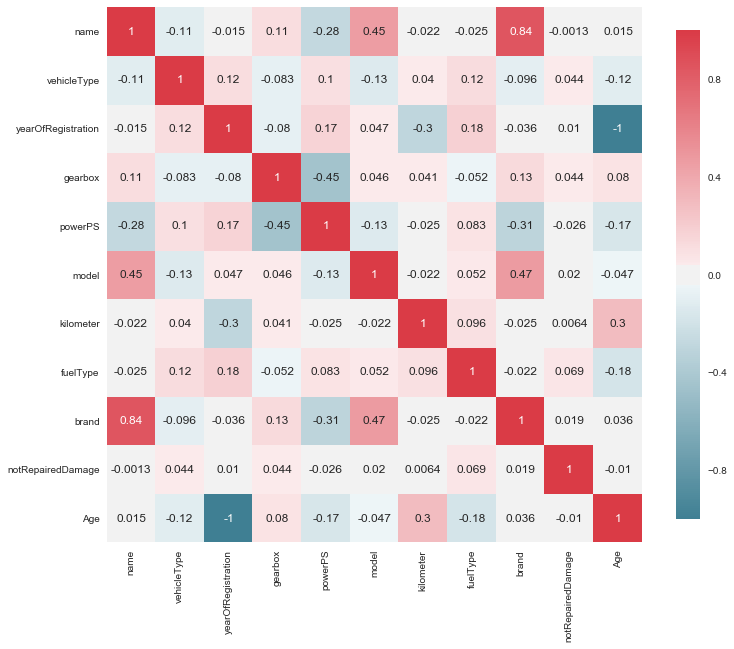

In [71]:
plot_correlation_map(cars)
plt.show()

In [72]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)